In [15]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'
df = pd.read_csv(path)
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [3]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [4]:
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x)
df['ppm_fixed'].fillna(method='backfill', inplace=True)

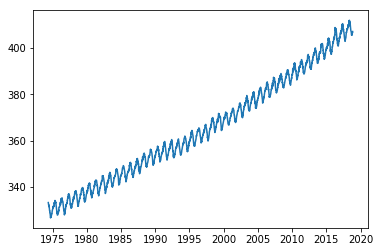

In [6]:
plt.plot(df.date, df.ppm_fixed);

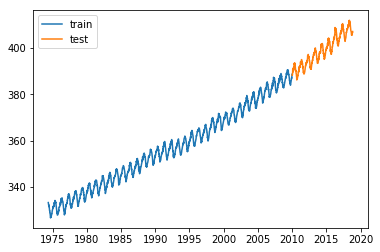

In [10]:
train = df[df.year < 2010]
test = df[df.year >= 2010]

plt.plot(train.date, train.ppm_fixed, label='train');
plt.plot(test.date, test.ppm_fixed, label='test');
plt.legend();

In [11]:
#Prophet

In [16]:
fb_df = train[['date', 'ppm_fixed']].copy()
fb_df.columns = ['ds', 'y']
fb_df.head()

,ds,y
0,1974-05-19,333.34
1,1974-05-26,332.95
2,1974-06-02,332.32
3,1974-06-09,332.18
4,1974-06-16,332.37


In [17]:
m = Prophet()
m.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [19]:
future = m.make_future_dataframe(periods=len(test), freq='W', include_history=False)
future.head()

,ds
0,2010-01-03
1,2010-01-10
2,2010-01-17
3,2010-01-24
4,2010-01-31


In [21]:
future.tail()

,ds
457,2018-10-07
458,2018-10-14
459,2018-10-21
460,2018-10-28
461,2018-11-04


In [22]:
test.tail()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date,ppm_fixed
2316,2018,10,7,2018.7658,405.58,7,403.38,382.78,129.25,2018-10-07,405.58
2317,2018,10,14,2018.7849,406.00,6,403.81,382.92,129.45,2018-10-14,406.00
2318,2018,10,21,2018.8041,406.62,7,404.04,383.04,129.77,2018-10-21,406.62
2319,2018,10,28,2018.8233,406.48,6,404.07,383.96,129.29,2018-10-28,406.48
2320,2018,11,4,2018.8425,406.99,5,404.26,383.80,129.43,2018-11-04,406.99


In [23]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-03,388.641633,387.915554,388.989820,388.641633,388.641633,-0.172879,-0.172879,-0.172879,-0.172879,-0.172879,-0.172879,0.0,0.0,0.0,388.468754
1,2010-01-10,388.679627,388.126144,389.226564,388.679627,388.679627,0.020888,0.020888,0.020888,0.020888,0.020888,0.020888,0.0,0.0,0.0,388.700515
2,2010-01-17,388.717621,388.429076,389.451472,388.717621,388.717621,0.204728,0.204728,0.204728,0.204728,0.204728,0.204728,0.0,0.0,0.0,388.922349
3,2010-01-24,388.755615,388.583939,389.653185,388.755615,388.755615,0.366828,0.366828,0.366828,0.366828,0.366828,0.366828,0.0,0.0,0.0,389.122442
4,2010-01-31,388.793609,388.787848,389.832622,388.793609,388.793609,0.503910,0.503910,0.503910,0.503910,0.503910,0.503910,0.0,0.0,0.0,389.297518


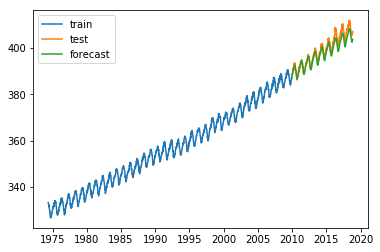

In [24]:
#yhat

plt.plot(train.date, train.ppm_fixed, label='train');
plt.plot(test.date, test.ppm_fixed, label='test');
plt.plot(test.date, forecast.yhat, label='forecast');
plt.legend();

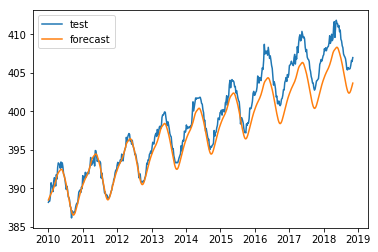

In [25]:
plt.plot(test.date, test.ppm_fixed, label='test');
plt.plot(test.date, forecast.yhat, label='forecast');
plt.legend();

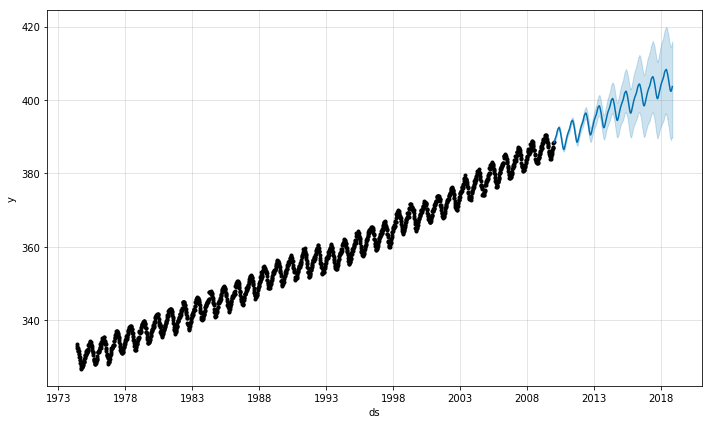

In [27]:
m.plot(forecast);